# Import Libraries & Data

In [21]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv("/content/drive/My Drive/car_evaluation.csv", header= None)

In [23]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Exploring & Cleaning The Data

In [24]:
col_names = ["buying", "maint", "doors", "persons", "lug_boots", "safety", "class"]
df.columns = col_names

df.head()

,buying,maint,doors,persons,lug_boots,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   object
 1   maint      1728 non-null   object
 2   doors      1728 non-null   object
 3   persons    1728 non-null   object
 4   lug_boots  1728 non-null   object
 5   safety     1728 non-null   object
 6   class      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [26]:
cols = ['buying', 'maint', 'lug_boots', 'safety', 'doors', 'persons', 'class']
df[cols] = df[cols].astype(str)

In [27]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boots,0
safety,0
class,0


In [28]:
df["class"].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


# Split Data to Inputs & Output

In [29]:
X = df.drop(["class"], axis = 1)
y = df["class"]

In [30]:
X.head()

,buying,maint,doors,persons,lug_boots,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [31]:
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [32]:
print(X['buying'].value_counts())
print("-----------------------------")
print(X['maint'].value_counts())
print("-----------------------------")
print(X['lug_boots'].value_counts())
print("-----------------------------")
print(X['safety'].value_counts())
print("-----------------------------")
print(X['doors'].value_counts())
print("-----------------------------")
print(X['persons'].value_counts())
print("-----------------------------")
print(y.value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
-----------------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
-----------------------------
lug_boots
small    576
med      576
big      576
Name: count, dtype: int64
-----------------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64
-----------------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
-----------------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64
-----------------------------
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [33]:
from sklearn.preprocessing import OrdinalEncoder

buying_maint_order = ['low', 'med', 'high', 'vhigh']
encoder = OrdinalEncoder(categories=[buying_maint_order, buying_maint_order])

X[['buying', 'maint']] = encoder.fit_transform(X[['buying', 'maint']])

encoder = OrdinalEncoder(categories=[['small','med','big']])
X[['lug_boots']] = encoder.fit_transform(X[['lug_boots']])

encoder = OrdinalEncoder(categories=[['low','med','high']])
X[['safety']] = encoder.fit_transform(X[['safety']])

encoder = OrdinalEncoder(categories=[['2','3','4','5more']])
X[['doors']] = encoder.fit_transform(X[['doors']])

encoder = OrdinalEncoder(categories=[['2','4','more']])
X[['persons']] = encoder.fit_transform(X[['persons']])

encoder = OrdinalEncoder(categories=[['unacc', 'acc', 'good', 'vgood']])
y = encoder.fit_transform(y.to_frame())

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   buying     1728 non-null   float64
 1   maint      1728 non-null   float64
 2   doors      1728 non-null   float64
 3   persons    1728 non-null   float64
 4   lug_boots  1728 non-null   float64
 5   safety     1728 non-null   float64
dtypes: float64(6)
memory usage: 81.1 KB


In [44]:
y = pd.Series(y.flatten(), name='class')

In [46]:
y.value_counts()

,count
class,
0.0,1210
1.0,384
2.0,69
3.0,65


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)

(1209, 6)
(519, 6)


# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion='gini', max_depth= 10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [51]:
pred = DT_model.predict(X_test)

# evaluation

In [56]:
from sklearn.metrics import accuracy_score

print("Model accuracy score: {0:0.2f}".format(accuracy_score(y_test, pred)*100))

Model accuracy score: 96.92


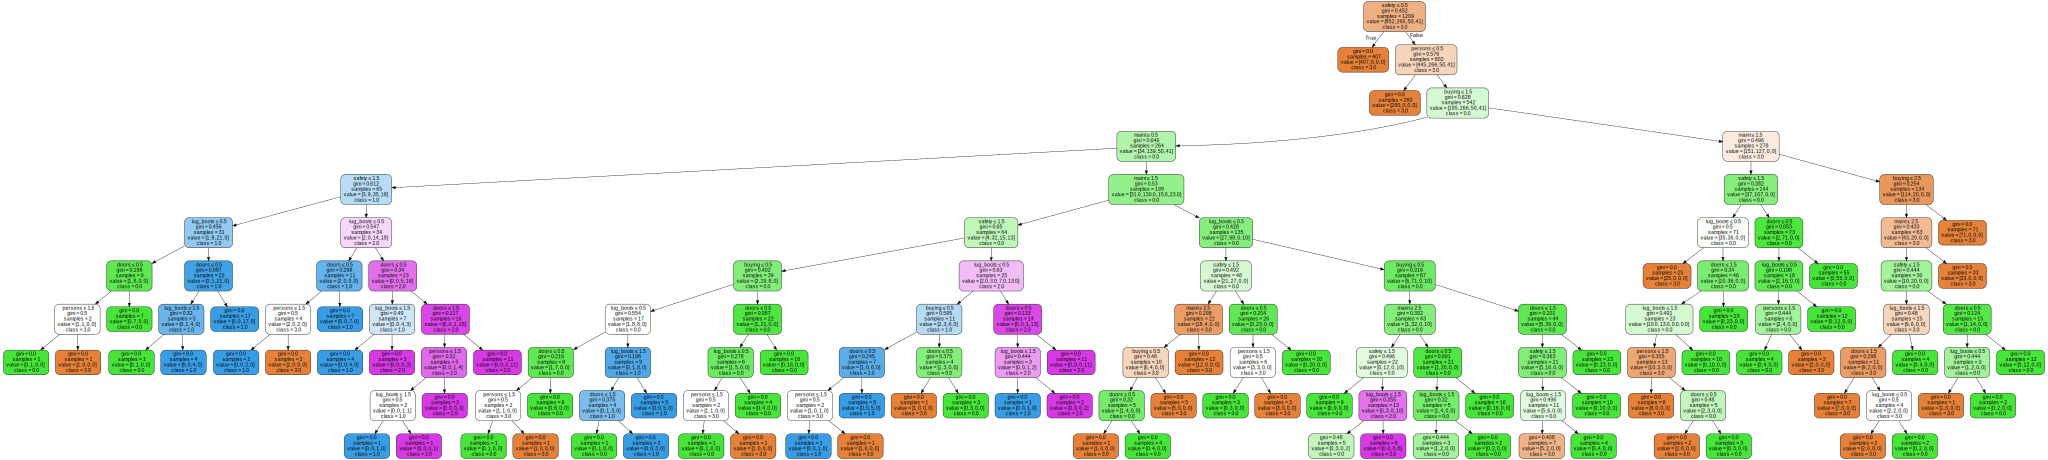

In [58]:

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(DT_model,
                                feature_names = [str(col) for col in X_train.columns],
                                class_names = [str(cls) for cls in y_train.unique()],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

graph